# ANOMALY DETECTION

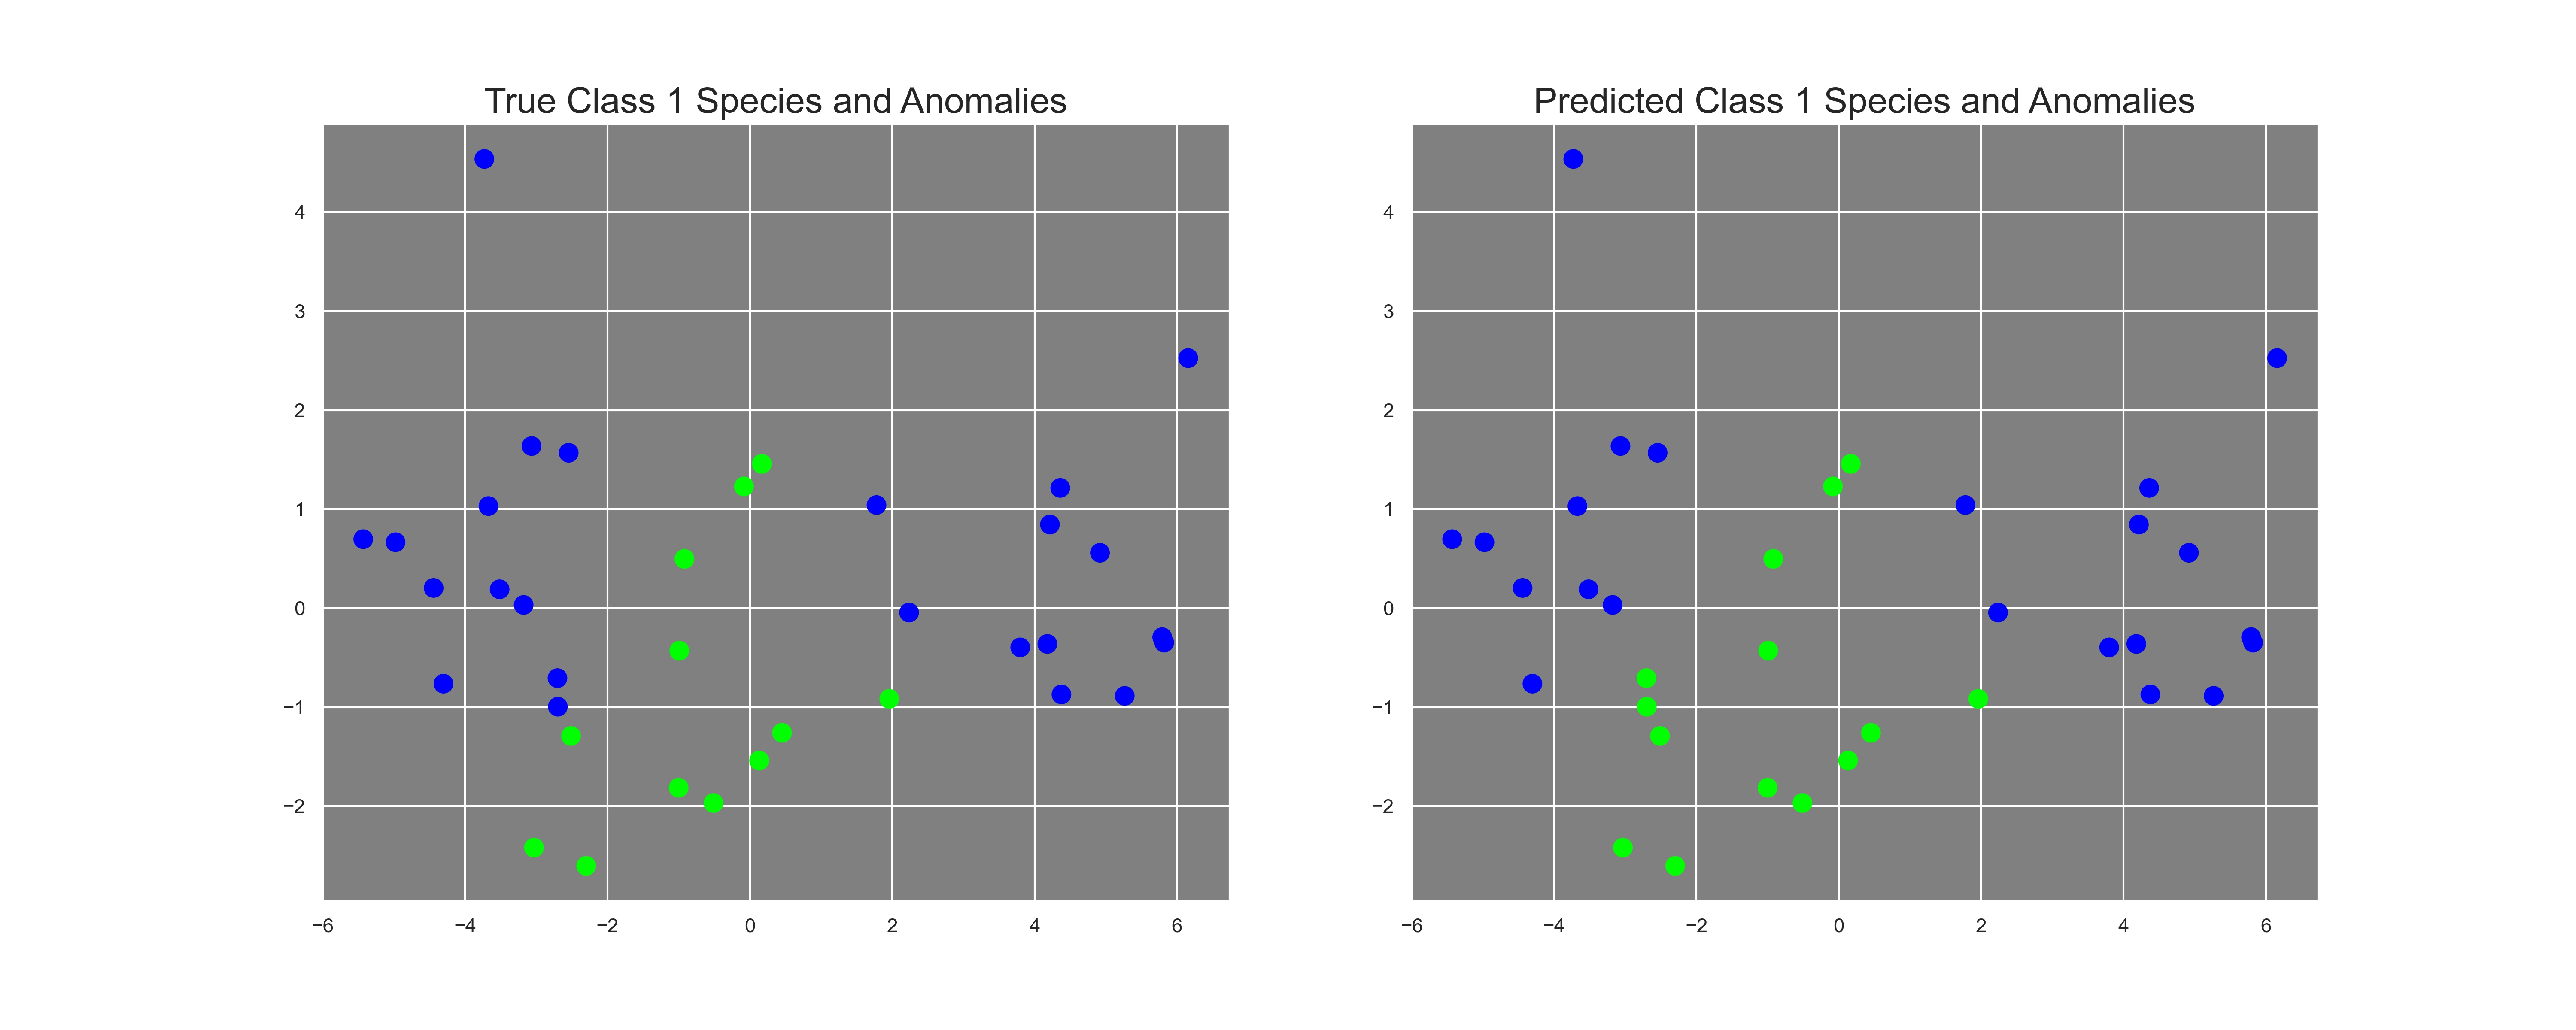

# Table of Contents

<li><a href="#Intro">Introduction<a></li>
<li><a href="#data_describe">Data Description<a></li>
<li><a href="#aim">Aim and Objectives<a></li>
<li><a href="#Class 1">Class 1<a></li>
<li><a href="#Class 2">Class 2<a></li>
<li><a href="#Class 3">Class 3<a></li>

<a id='Intro'></a>
# Introduction

Anomaly detection is a form of unsupervised Machine Learning (ML) which compares a base or reference dataset to new datasets to detect variations within the new dataset which do not conform with what is contained in the reference dataset, and by so doing invariably detect novelties or anomalies in the new input (Omar, Ngadi, and Jebur, 2013). In essence, it works as a binary classification system identifying sample points within the new datasets which conform and do not conform with its reference data samples. In this analysis, the anomaly detection ML model was employed in determining variations in species in a dataset containing three distinct species of wheat.

<a id='data_describe'></a>
# Data Description


The dataset consisted of samples of three species of wheat- Kama, Rosa, and Canadian wheat, with labels 1,2, and 3 utilized to represent each of these species. For each sample, seven parameters have been obtained with the aid of high-quality visualization. <br>
<br>
These parameters are believed to be an indicator of the wheat species for any given sample (Dziki and Laskowski, 2005), varying significantly for each wheat species. The parameters serve as the input features which would be employed by the anomaly detection algorithm in predicting the species of a given sample. <br>
<br>
The dataset consisted of 70 samples of each species (totaling 210 samples). 12 samples were excluded from the 210 samples at random to serve as the test dataset for evaluating the performance of the ML model. The labels for these test datasets were also eliminated. The labels of the 198 remaining samples were retained to be used for model training and cross-validation (collectively referred to as complete training dataset) of the anomaly detection algorithm.  

<a id='aim'></a>
# Aim and Objectives

- *AIM:* The primary aim of this analysis is to evaluate the anomaly detection machine learning model, using the one class Support Vector Machine (SVM)<br>
<br>
- *Objectives:*<br>
1)Assess the one-class SVM for each clas of wheat<br>
2)Compare and contrast results obtained from each individual class<br>
3)Describe major findings

### Importing Necessary Libraries

In [66]:
# Data processing libraries
import numpy as np
import pandas as pd

#  Data Visualisation libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA   # Machine Learning used for dimensionality reduction for visualisation
import seaborn as sns

# Anomaly detction model algorithm
from sklearn.svm import OneClassSVM

# Model performance
from sklearn.metrics import classification_report

<a id='Class 1'></a>
# CLASS 1

### Peliminary Data Description

In [67]:
dataset1 = pd.read_excel("seeds_dataset_Randomized_for_HW_Class1_only.xlsx")

In [68]:
dataset1.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kernel groove
0,14.92,14.43,0.9006,5.384,3.412,1.1420,5.088
1,13.02,13.76,0.8641,5.395,3.026,3.3730,4.825
2,14.59,14.28,0.8993,5.351,3.333,4.1850,4.781
3,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607
4,15.88,14.90,0.8988,5.618,3.507,0.7651,5.091


In [69]:
dataset1.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kernel groove
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,14.370556,14.295926,0.882122,5.497778,3.256278,2.679041,5.089463
std,1.215644,0.574566,0.016438,0.225105,0.184455,1.209734,0.240510
min,11.230000,12.630000,0.845800,4.902000,2.850000,0.765100,4.607000
25%,13.785000,13.960000,0.869200,5.378000,3.155250,1.942000,4.956000
50%,14.360000,14.285000,0.882150,5.523500,3.258500,2.524500,5.094000
75%,15.045000,14.677500,0.894925,5.677000,3.382000,3.361750,5.223000
max,17.080000,15.380000,0.918300,5.884000,3.683000,6.685000,5.533000


In [70]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     54 non-null     float64
 1   Perimeter                54 non-null     float64
 2   Compactness              54 non-null     float64
 3   Length                   54 non-null     float64
 4   Width                    54 non-null     float64
 5   Asymmetry                54 non-null     float64
 6   Length of kernel groove  54 non-null     float64
dtypes: float64(7)
memory usage: 3.1 KB


### Data Exploration

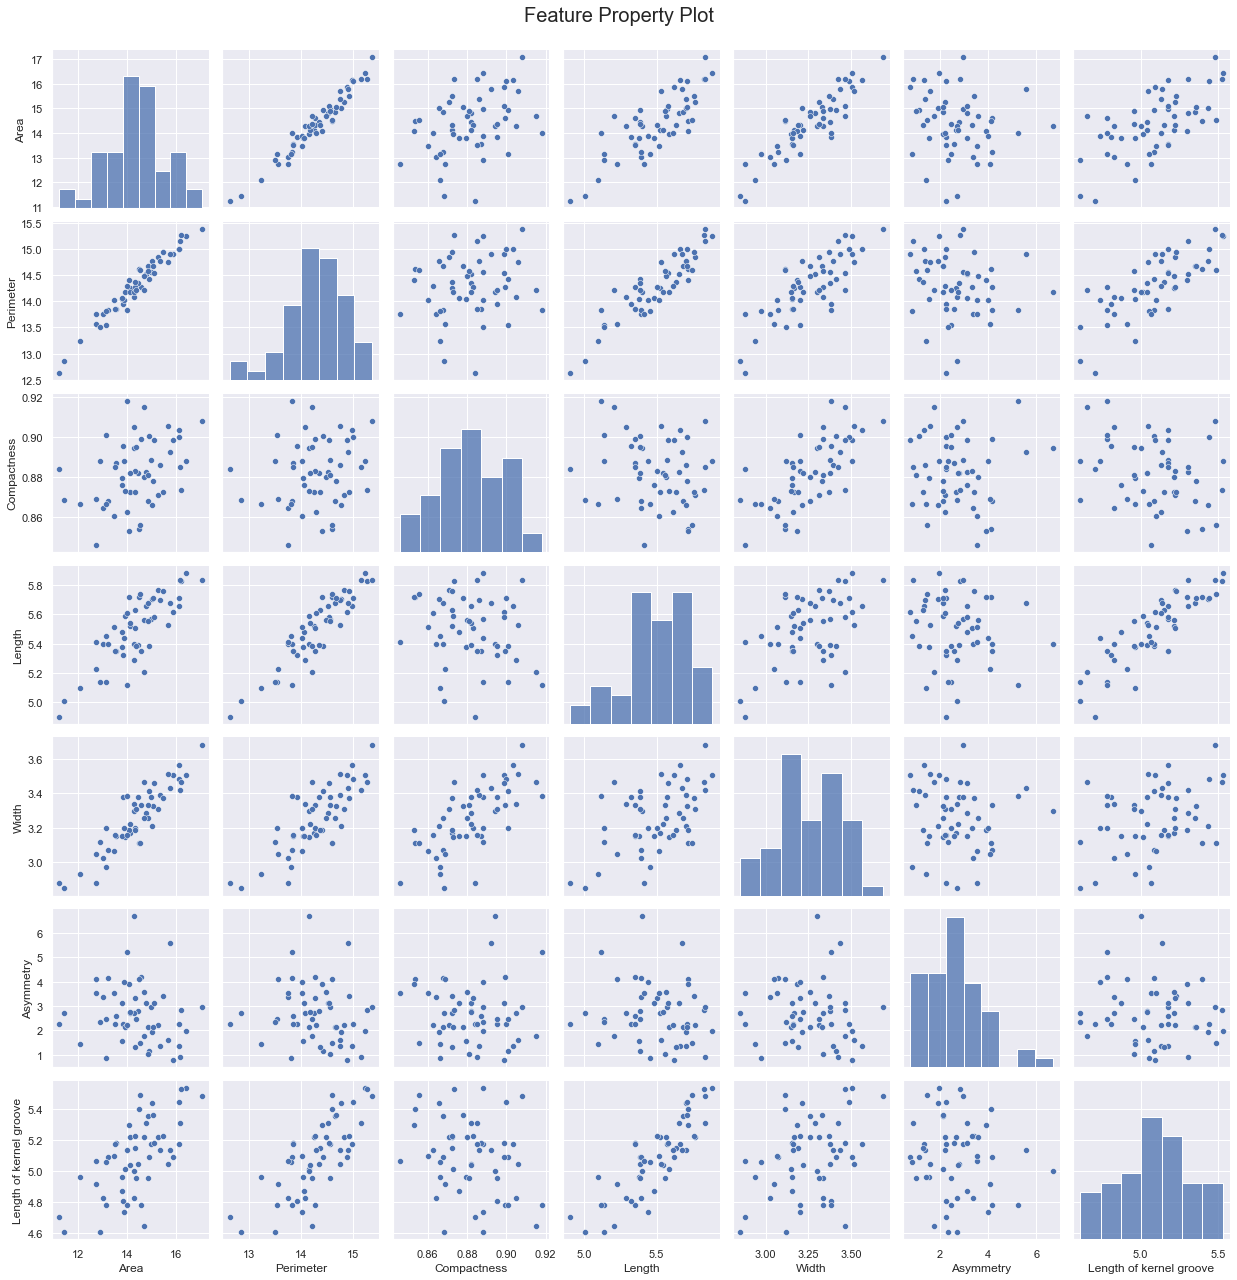

In [71]:
# Visualising the corelation between the features

fig1 = pair_plot1 = sns.pairplot(dataset1)
fig1.fig.suptitle("Feature Property Plot", fontsize=20, y=1.02)
fig1.figure.savefig("Pairplot1.jpg")

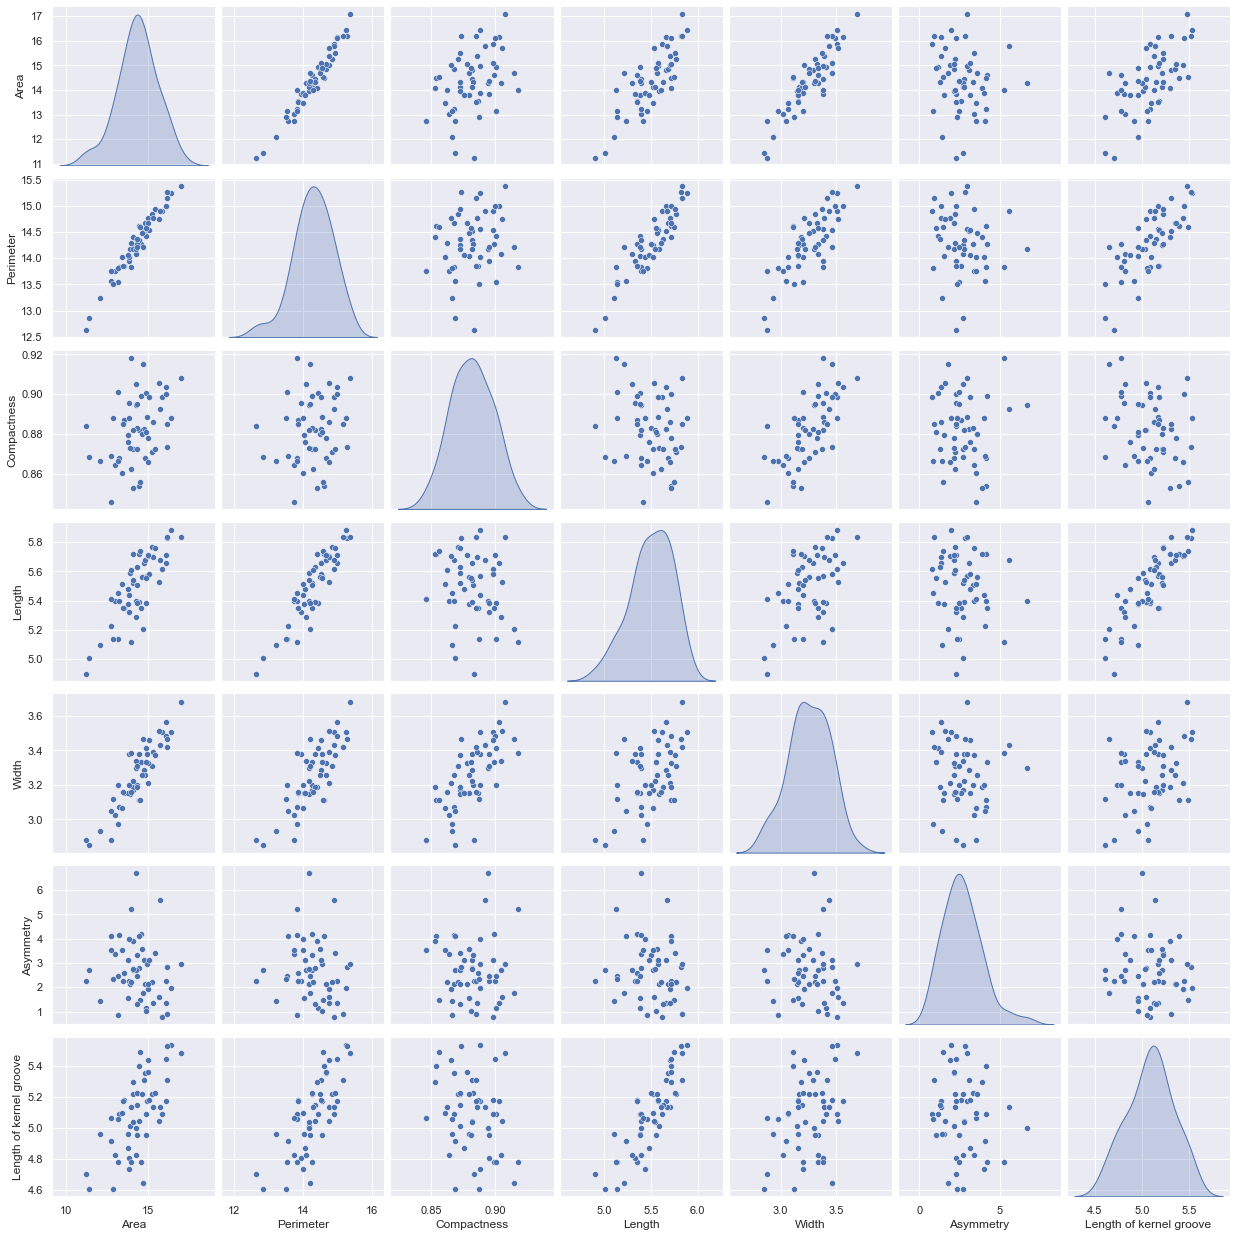

In [72]:
# Visualising the corelation between the features with labels imposed 

pair_plot2 =sns.pairplot(dataset1, diag_kind="kde")
fig1.fig.suptitle("Feature Property Plot", fontsize=20, y=1.02)
fig = pair_plot2.figure.savefig("Pairplot2.jpg")

### Training and Cross Evaluation

In [73]:
# Train the one class support vector machine (SVM) model
one_class_svm_dataset1 = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(dataset1)

In [74]:
# Importing the cross evaluation dataset
cross_eval_dataset = pd.read_excel("Cross_Eval_General_Dataset.xlsx")


# Predict the anomalies within the cross evaluation dataset
prediction = one_class_svm_dataset1.predict(cross_eval_dataset)

print(prediction)

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1]


In [75]:
# Imports true labels for cross evaluation dataset
cross_eval_labels_class1 = pd.read_excel("Cross_Eval_Labels_Class1_Normal.xlsx")

# Coverts the labels into a numpy array
cross_eval_labels_class1 = np.asarray(cross_eval_labels_class1)

# print(cross_eval_labels_class1)

In [76]:
# Changing the anomaly values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]

# Check the model performance
print(classification_report(cross_eval_labels_class1, prediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.92      0.96        24

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36



In [77]:
def heatmap(a,b,c,d):
    
    import seaborn as sns; sns.set()
    from sklearn.metrics import confusion_matrix
    
    # Function to plot heatmap of the predicted labels against actual labels
    
    cm = confusion_matrix(a, b)
    ax = sns.heatmap(cm, linewidths=2, linecolor='black',  annot=True, fmt="d", cmap="Greens")
    ax.set_title(f"{c}", fontsize =15)
    plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Actual Label', fontsize = 15) # y-axis label with fontsize 15
    fig = ax.figure.savefig(f"{d}")

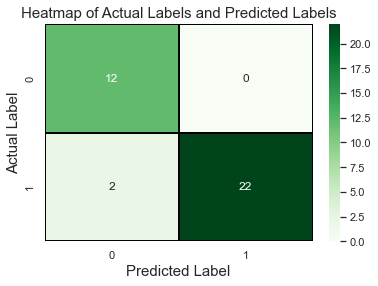

In [78]:
# Heat map of predicted values against actual values

heatmap(cross_eval_labels_class1, prediction, "Heatmap of Actual Labels and Predicted Labels", "Cross_tab_heatmap_for_class1.jpg")

##### Visualising the Ground Truth and Anomalies Detected

In [79]:
def train_plot(a,b,c,d):
    
    # Using PCA to reduce the dimensionality of the features for visualization
    pca = PCA(n_components=2)
    pca.fit(cross_eval_dataset)
    two_com_train_set = pca.transform(cross_eval_dataset)  # saves the 2 generated
    
    # Visualize the actual and predicted anomalies
    fig, (ax0, ax1)=plt.subplots(1,2, figsize=(20,8), dpi=300)

    # Ground truth
    ax0.set_title(f'True Class {c} Species and Anomalies', fontsize=20)
    ax0.scatter(two_com_train_set[:,0], two_com_train_set[:,1], s=100, c=a, cmap='brg_r')
    ax0.set_facecolor("grey")

    #Anomalies
    ax1.set_title(f'Predicted Class {c} Species and Anomalies', fontsize=20)
    ax1.scatter(two_com_train_set[:,0], two_com_train_set[:,1], s=100, c=b, cmap='brg_r')
    ax1.set_facecolor("grey")

    # saves the image
    fig.savefig(f"{d}")

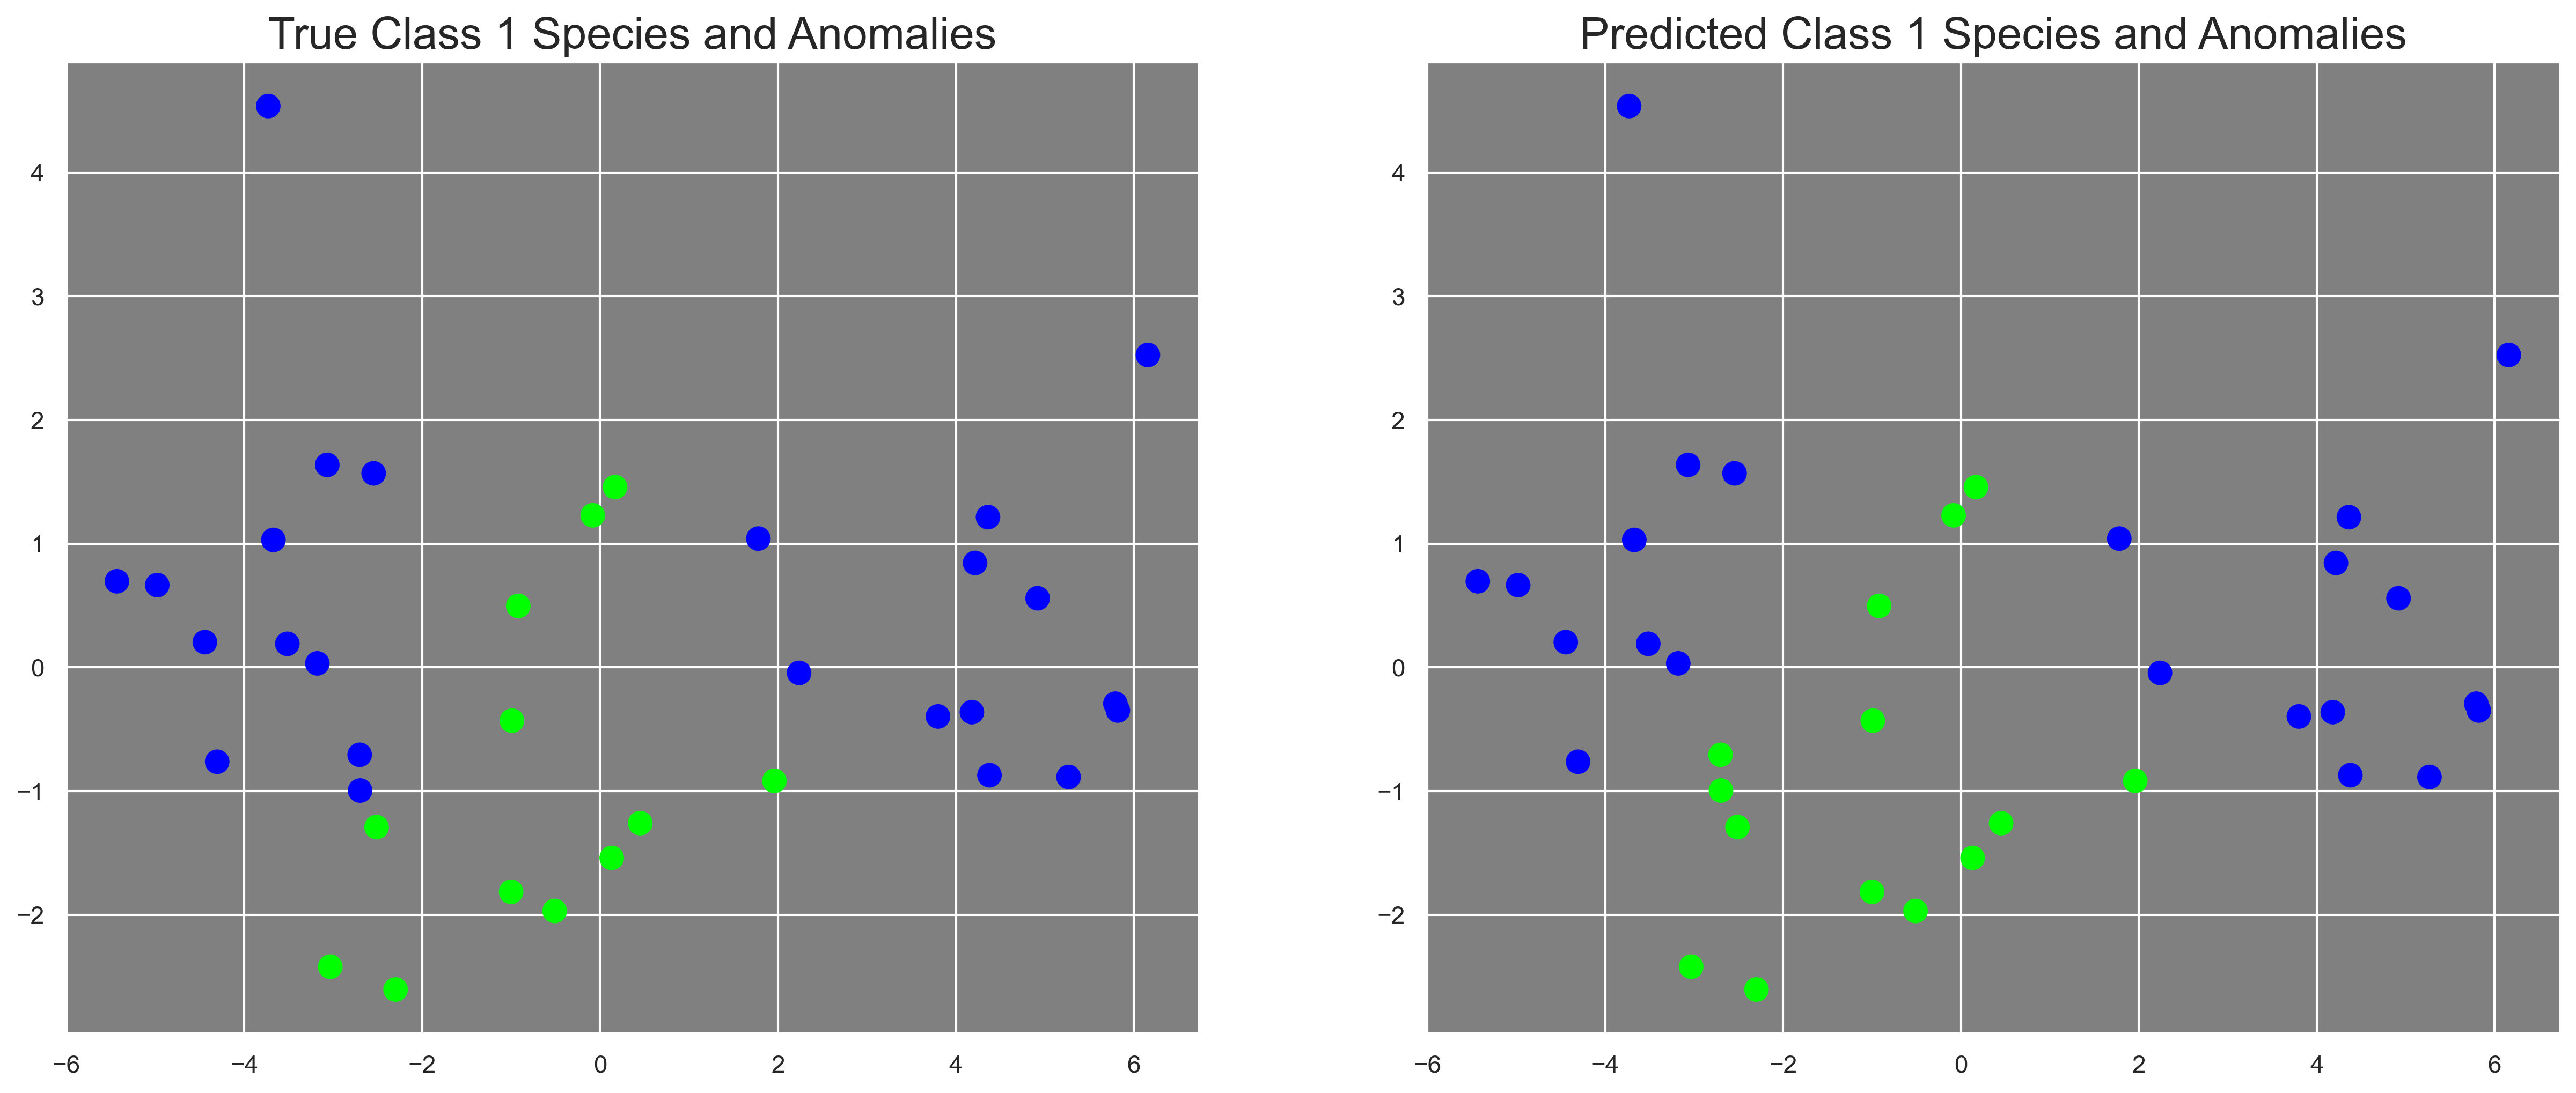

In [80]:
train_plot(cross_eval_labels_class1,prediction, 1, "Class1_Original_Anomaly.jpg")

### Test Set

In [81]:
# Importing the test dataset
class_test_dataset = pd.read_excel("seeds_dataset_subset_for_HW (1).xlsx")

In [82]:
class_test_dataset.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove
0,13.34,13.95,0.8620,5.389,3.074,5.995,5.307
1,20.24,16.91,0.8897,6.315,3.962,5.901,6.188
2,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
3,14.79,14.52,0.8819,5.545,3.291,2.704,5.111
4,12.36,13.19,0.8923,5.076,3.042,3.220,4.605


In [83]:
class_test_dataset.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,14.501667,14.400000,0.869958,5.565167,3.215167,4.367667,5.347333
std,2.971739,1.318436,0.023063,0.440495,0.381590,1.601031,0.531952
min,10.930000,12.800000,0.827400,5.046000,2.717000,2.068000,4.605000
25%,12.420000,13.542500,0.857525,5.317750,3.005750,2.875000,5.033750
50%,13.540000,14.000000,0.874700,5.451000,3.094000,4.697500,5.224000
75%,15.590000,14.855000,0.890050,5.631250,3.386250,5.523750,5.539250
max,20.240000,16.910000,0.899200,6.445000,3.962000,7.035000,6.362000


In [84]:
# Predict the anomalies within the test dataset
prediction_test_class1 = one_class_svm_dataset1.predict(class_test_dataset)
print(prediction_test_class1)

[-1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1]


In [85]:
def test_plot(Y,Z): 
    
    # Function to visualise the clusters on a scatter plot using PCA
    
    pca = PCA(n_components=2)
    pca.fit(class_test_dataset)
    two_com_test_set = pca.transform(class_test_dataset)  # saves the 2 generated components into a variable
    
    
    plt.scatter(two_com_test_set[:,0], two_com_test_set[:,1], s=100, c=Y, cmap="brg_r");

    plt.savefig(Z)

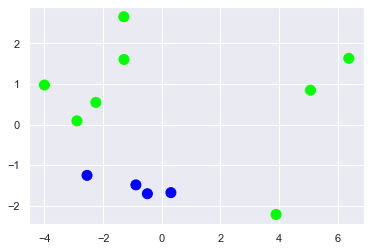

In [86]:
# A scatter plot of the Predicted test labels
test_plot(prediction_test_class1, "Class1_Test_set.jpg")

<a id='Class 2'></a>
# CLASS 2

### Peliminary Data Description

In [87]:
dataset2 = pd.read_excel("seeds_dataset_Randomized_for_HW_Class2_only.xlsx")

In [88]:
dataset2.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kernel groove
0,17.26,15.73,0.8763,5.978,3.594,4.539,5.791
1,18.89,16.23,0.9008,6.227,3.769,3.639,5.966
2,18.27,16.09,0.8870,6.173,3.651,2.443,6.197
3,18.43,15.97,0.9077,5.980,3.771,2.984,5.905
4,18.59,16.05,0.9066,6.037,3.860,6.001,5.877


In [89]:
dataset2.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kernel groove
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,18.145455,16.048364,0.883867,6.113291,3.660145,3.802436,5.989345
std,1.462932,0.615126,0.016694,0.266328,0.195403,1.091932,0.251364
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.738000,5.144000
25%,17.065000,15.665000,0.871100,5.978500,3.498500,2.960000,5.878000
50%,18.550000,16.180000,0.885000,6.139000,3.687000,3.678000,5.965000
75%,19.085000,16.450000,0.898950,6.271500,3.812000,4.456500,6.174000
max,21.180000,17.230000,0.910800,6.675000,4.033000,6.682000,6.550000


In [90]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     55 non-null     float64
 1   Perimeter                55 non-null     float64
 2   Compactness              55 non-null     float64
 3   Length                   55 non-null     float64
 4   Width                    55 non-null     float64
 5   Asymmetry                55 non-null     float64
 6   Length of kernel groove  55 non-null     float64
dtypes: float64(7)
memory usage: 3.1 KB


### Data Exploration

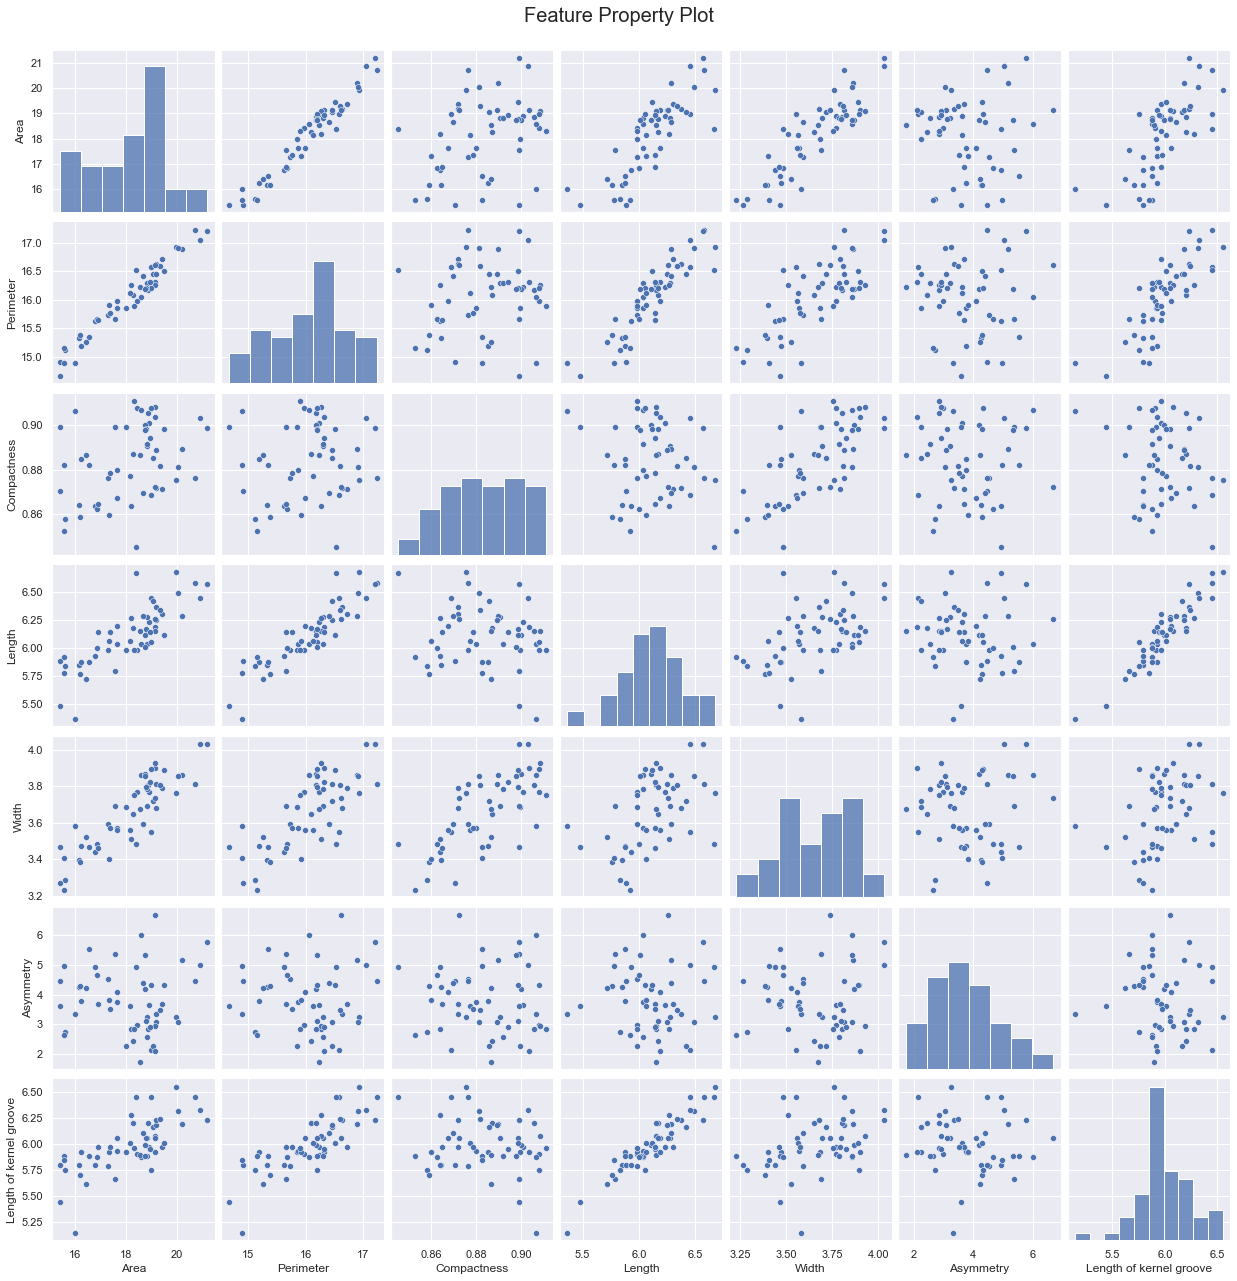

In [91]:
# Visualising the corelation between the features

fig1 = pair_plot1 = sns.pairplot(dataset2)
fig1.fig.suptitle("Feature Property Plot", fontsize=20, y=1.02)
fig1.figure.savefig("class2_Pairplot1.jpg")

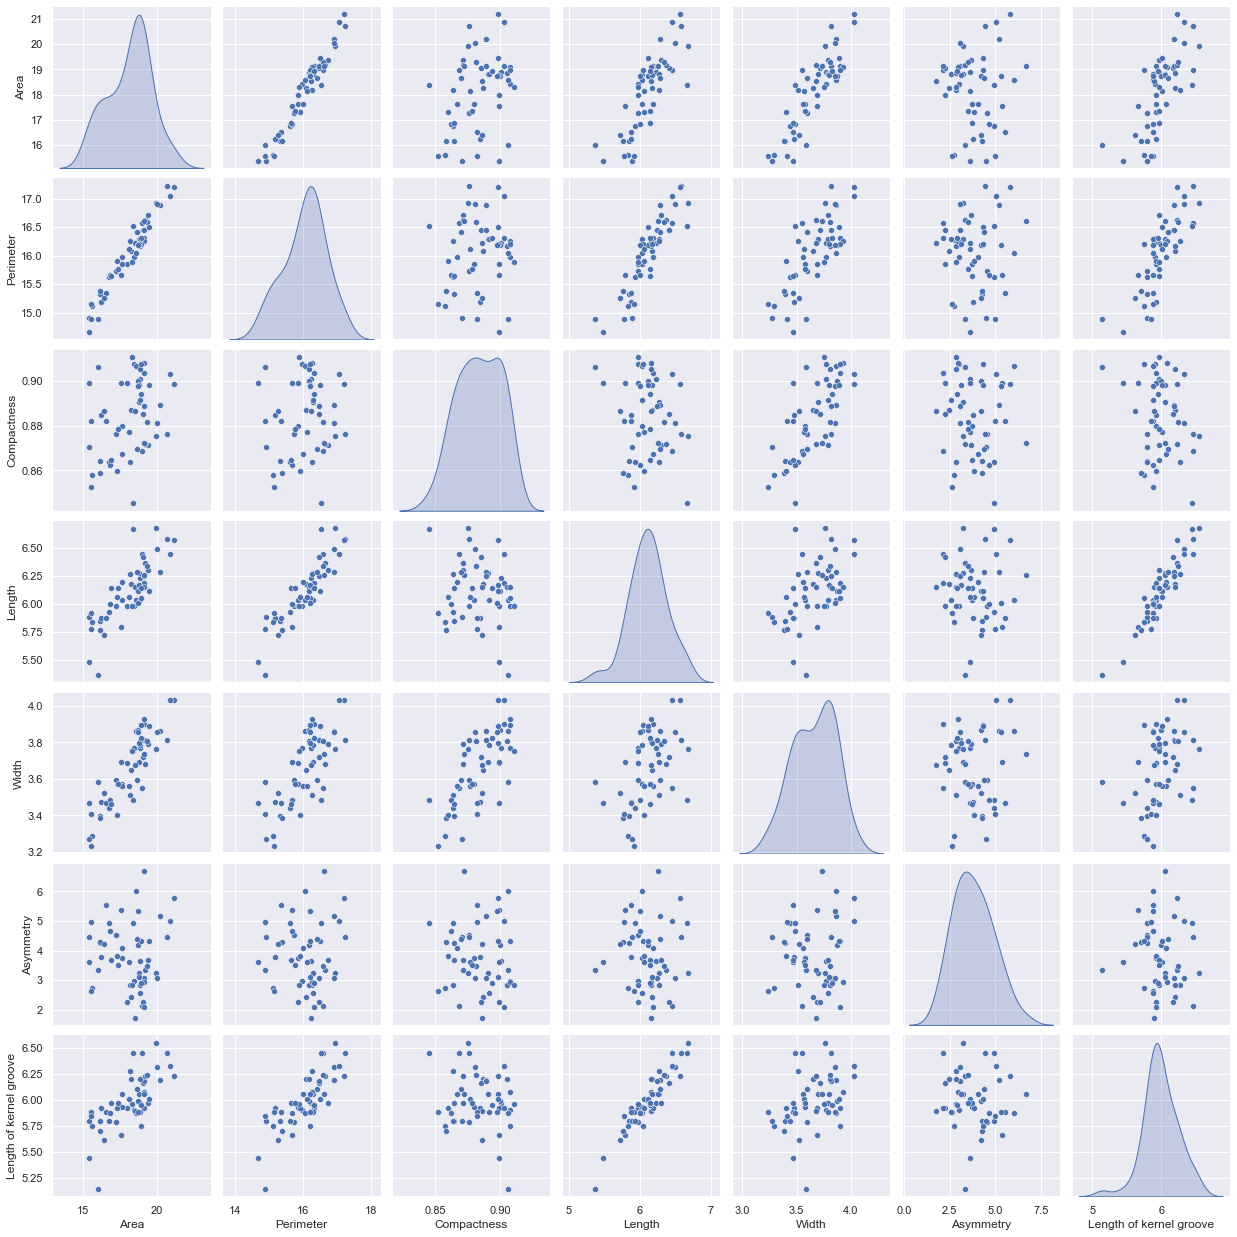

In [92]:
# Visualising the corelation between the features with labels imposed 

pair_plot2 =sns.pairplot(dataset2, diag_kind="kde")
fig1.fig.suptitle("Feature Property Plot", fontsize=20, y=1.02)
fig = pair_plot2.figure.savefig("class2_Pairplot2.jpg")

### Training and Cross Evaluation

In [93]:
# Train the one class support vector machine (SVM) model
one_class_svm_dataset2 = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(dataset2)

In [94]:
# Predict the anomalies within the cross evaluation dataset
class2_cross_eval_prediction = one_class_svm_dataset2.predict(cross_eval_dataset)

print(class2_cross_eval_prediction)

[-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [95]:
# Changing the anomaly values to make it consistent with the true values
class2_cross_eval_prediction = [1 if i==-1 else 0 for i in class2_cross_eval_prediction]

In [96]:
print(class2_cross_eval_prediction)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [97]:
# Imports true labels for cross evaluation dataset
cross_eval_labels_class2 = pd.read_excel("Cross_Eval_Labels_Class2_Normal.xlsx")

# Coverts the labels into a numpy array
cross_eval_labels_class2 = np.asarray(cross_eval_labels_class2)

# print(cross_eval_labels_class2)

In [98]:
# Check the model performance
print(classification_report(cross_eval_labels_class2, class2_cross_eval_prediction))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.85      0.96      0.90        24

    accuracy                           0.86        36
   macro avg       0.87      0.81      0.83        36
weighted avg       0.86      0.86      0.86        36



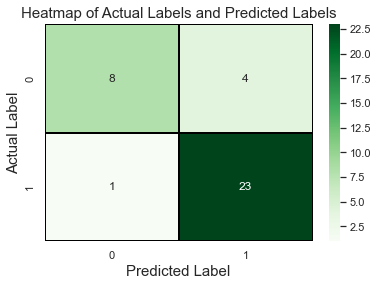

In [99]:
# Heat map of predicted values against actual values

heatmap(cross_eval_labels_class2, class2_cross_eval_prediction, "Heatmap of Actual Labels and Predicted Labels", "Cross_tab_heatmap_for_class2.jpg")

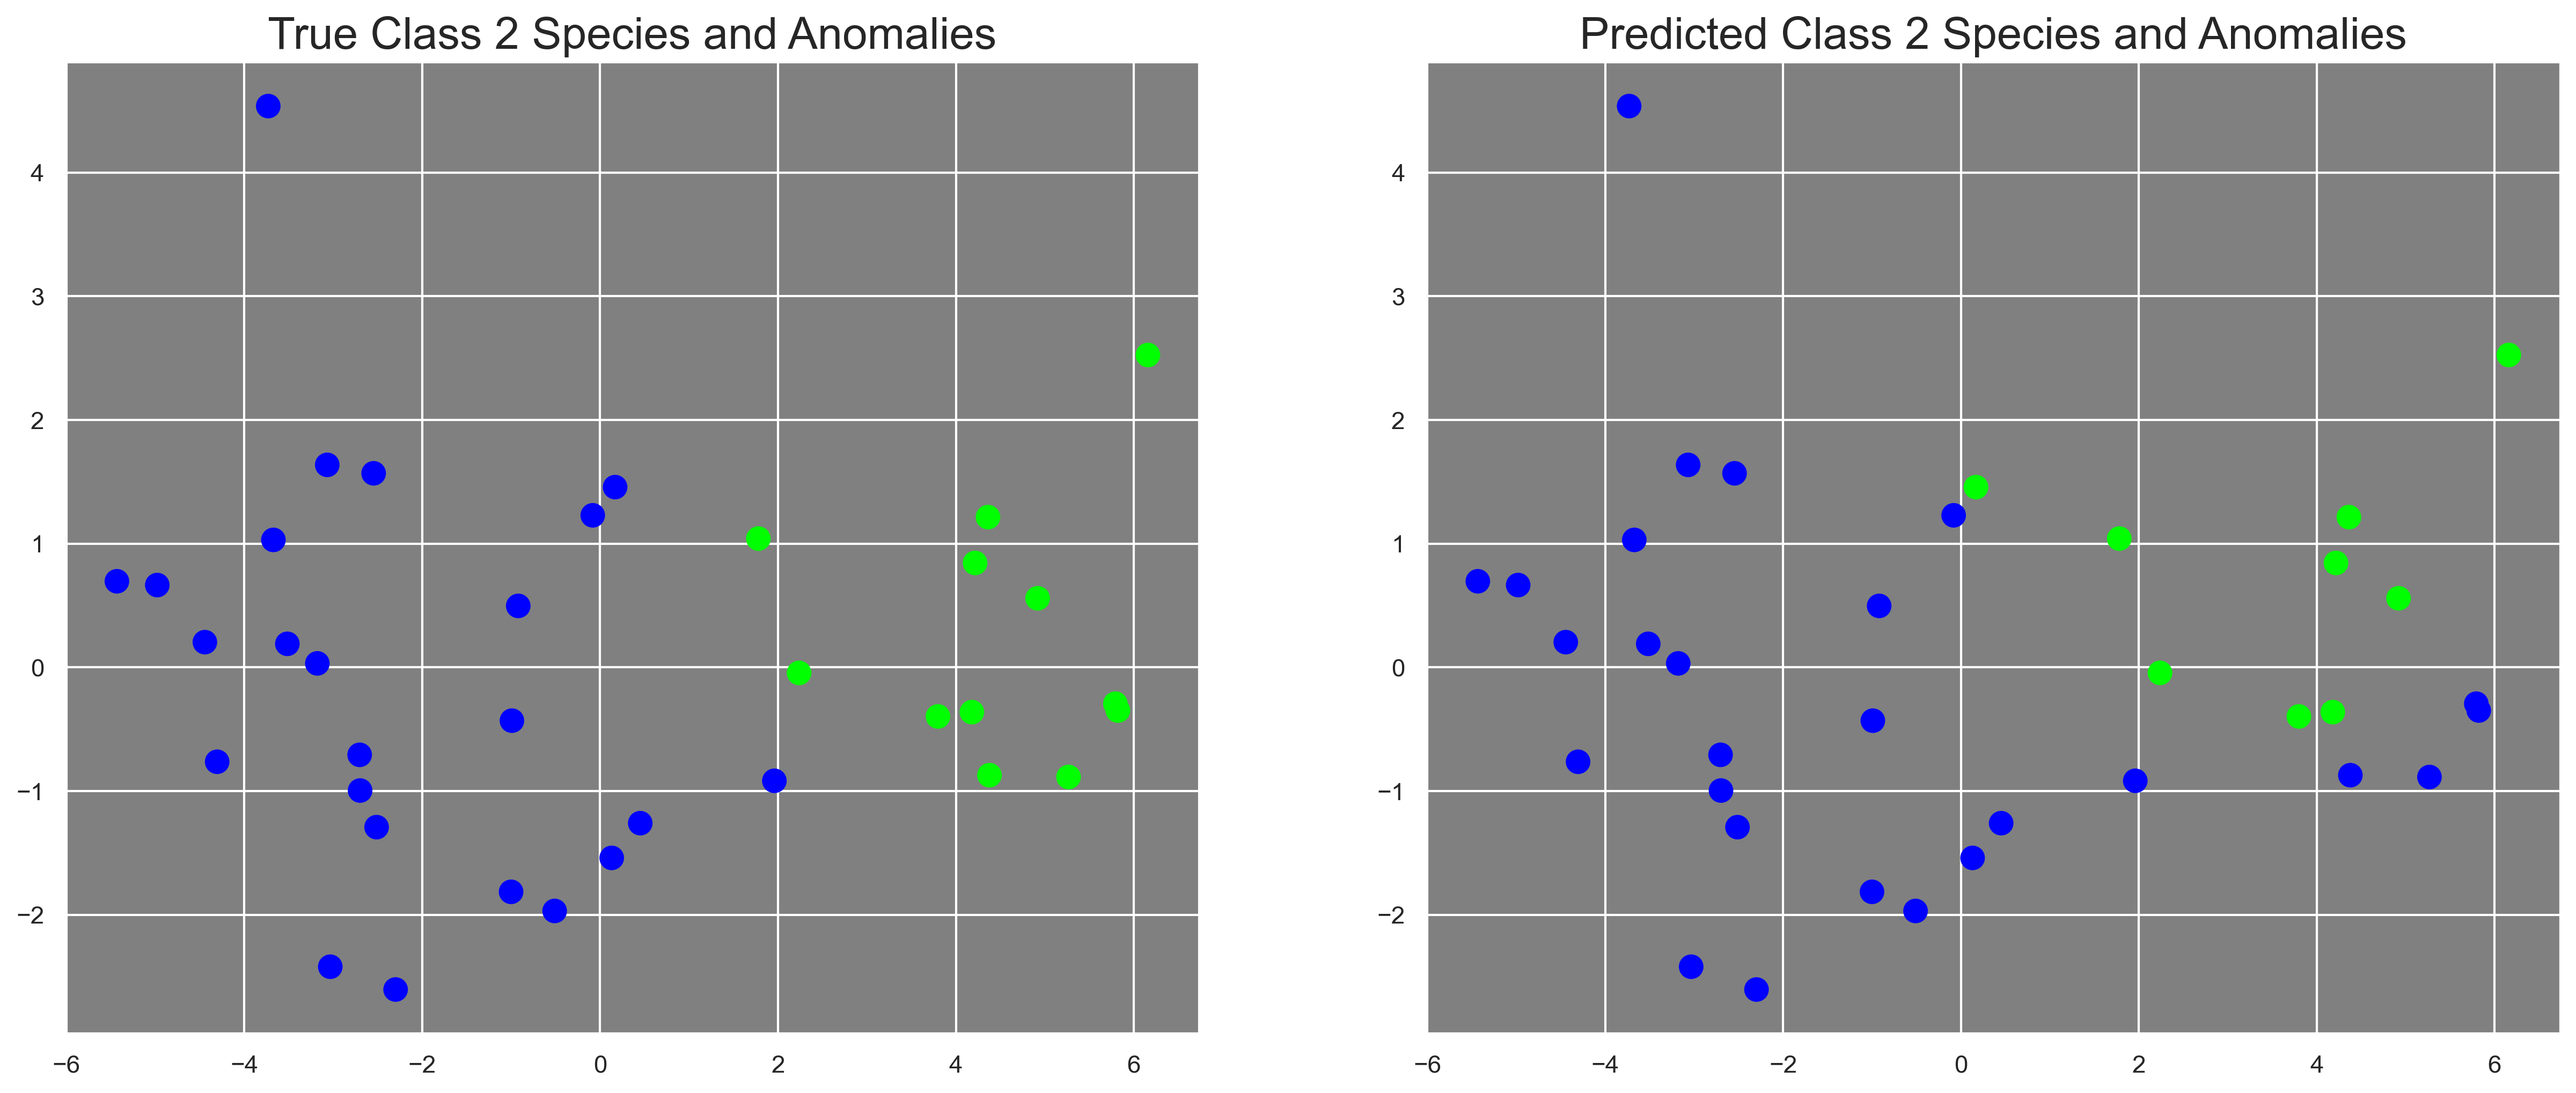

In [100]:
train_plot(cross_eval_labels_class2,class2_cross_eval_prediction,2, "Class2_Original_Anomaly.jpg")

### Class 2 Test Dataset

In [101]:
# Predict the anomalies within the test dataset
prediction_test_class2 = one_class_svm_dataset2.predict(class_test_dataset)
print(prediction_test_class2)

[-1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1]


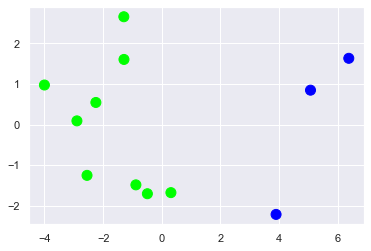

In [102]:
test_plot(prediction_test_class2,"Class2_test_set.jpg")

<a id='Class 3'></a>
# CLASS 3

### Peliminary Data Description

In [103]:
dataset3 = pd.read_excel("seeds_dataset_Randomized_for_HW_Class3_only.xlsx")

In [104]:
dataset3.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kernel groove
0,11.23,12.82,0.8594,5.089,2.821,7.524,4.957
1,11.48,13.05,0.8473,5.180,2.758,5.876,5.002
2,10.74,12.73,0.8329,5.145,2.642,4.702,4.963
3,10.80,12.57,0.8590,4.981,2.821,4.773,5.063
4,11.65,13.07,0.8575,5.108,2.850,5.209,5.135


In [105]:
dataset3.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kernel groove
count,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000
mean,11.793774,13.214340,0.848089,5.22566,2.837698,4.749132,5.118698
std,0.652717,0.303401,0.022109,0.12963,0.141607,1.327208,0.148013
min,10.740000,12.570000,0.808100,4.98100,2.641000,1.661000,4.745000
25%,11.260000,13.000000,0.833300,5.13600,2.716000,4.048000,5.003000
50%,11.750000,13.200000,0.849600,5.22400,2.821000,4.773000,5.132000
75%,12.220000,13.450000,0.859600,5.32500,2.941000,5.469000,5.221000
max,13.370000,13.780000,0.897700,5.49500,3.232000,8.315000,5.360000


In [106]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     53 non-null     float64
 1   Perimeter                53 non-null     float64
 2   Compactness              53 non-null     float64
 3   Length                   53 non-null     float64
 4   Width                    53 non-null     float64
 5   Asymmetry                53 non-null     float64
 6   Length of kernel groove  53 non-null     float64
dtypes: float64(7)
memory usage: 3.0 KB


### Data Exploration

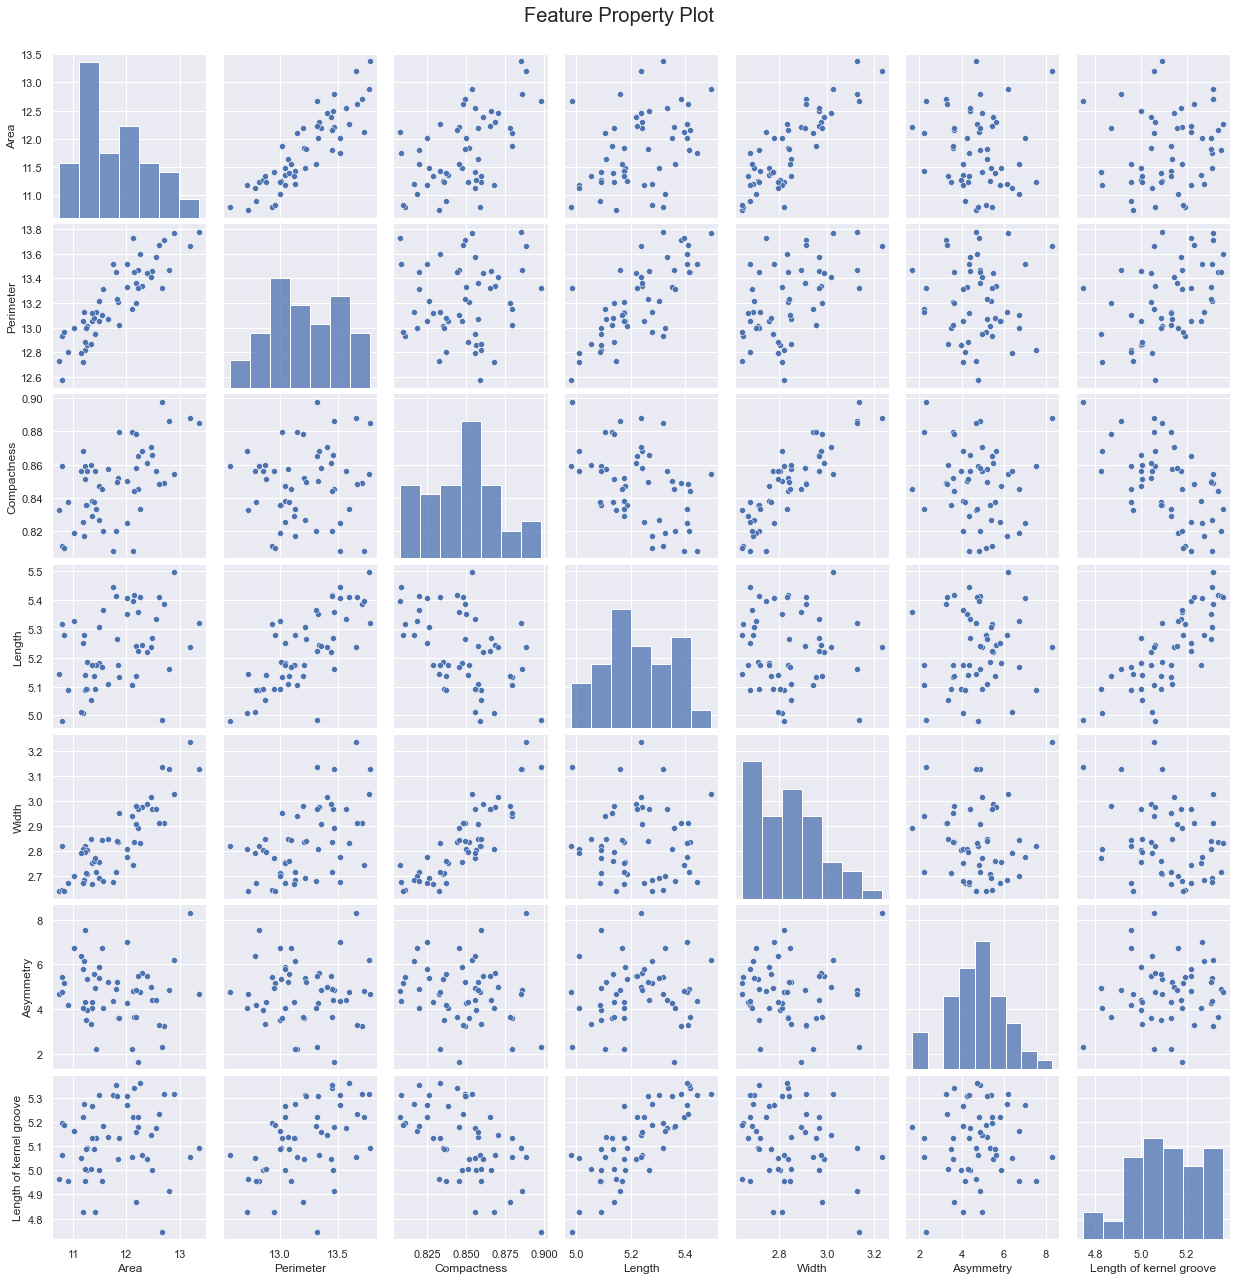

In [107]:
# Visualising the corelation between the features

fig1 = pair_plot3 = sns.pairplot(dataset3)
fig1.fig.suptitle("Feature Property Plot", fontsize=20, y=1.02)
fig1.figure.savefig("class3_Pairplot1.jpg")

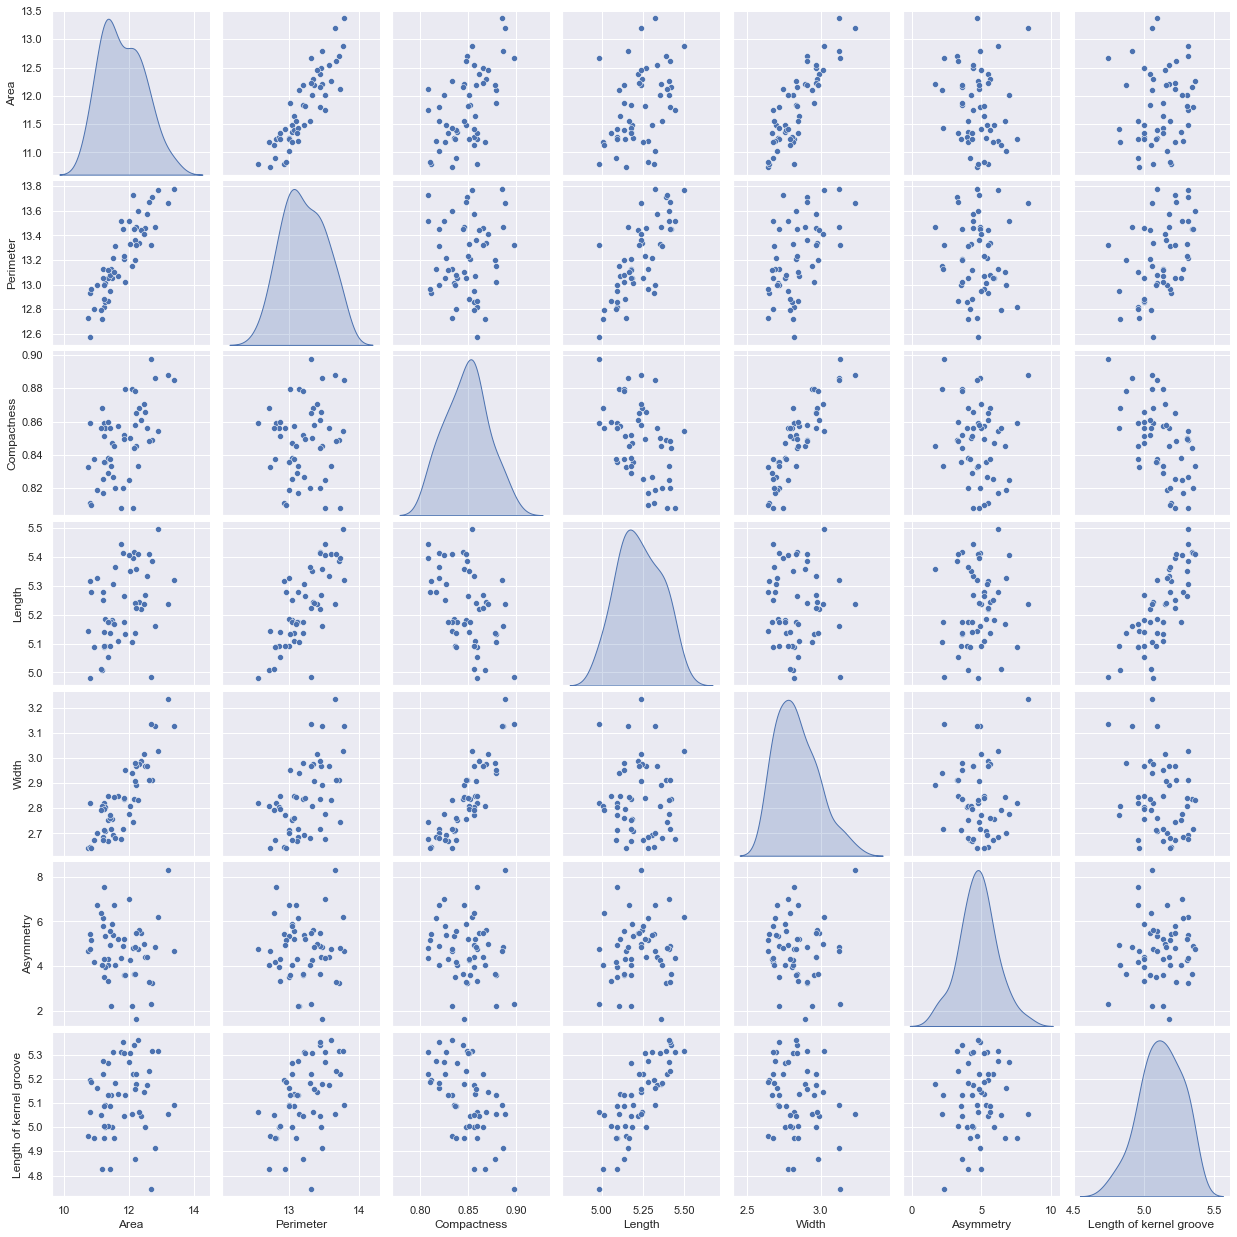

In [108]:
# Visualising the corelation between the features with labels imposed 

pair_plot3 =sns.pairplot(dataset3, diag_kind="kde")
fig1.fig.suptitle("Feature Property Plot", fontsize=20, y=1.02)
fig = pair_plot3.figure.savefig("class3_Pairplot2.jpg")

### Training and Cross Evaluation

In [109]:
# Train the one class support vector machine (SVM) model
one_class_svm_dataset3 = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(dataset3)

In [110]:
# Predict the anomalies within the cross evaluation dataset
class3_cross_eval_prediction = one_class_svm_dataset3.predict(cross_eval_dataset)

print(class3_cross_eval_prediction)

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1 -1  1  1  1  1  1  1]


In [111]:
# Changing the anomaly values to make it consistent with the true values
class3_cross_eval_prediction = [1 if i==-1 else 0 for i in class3_cross_eval_prediction]


In [112]:
print(class3_cross_eval_prediction)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [119]:
# Imports true labels for cross evaluation dataset
cross_eval_labels_class3 = pd.read_excel("Cross_Eval_Labels_Class3_Normal.xlsx")

# Coverts the labels into a numpy array
cross_eval_labels_class3 = np.asarray(cross_eval_labels_class3)

# print(cross_eval_labels_class3)

In [114]:
# Check the model performance
print(classification_report(cross_eval_labels_class3, class3_cross_eval_prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.96      0.96      0.96        24

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



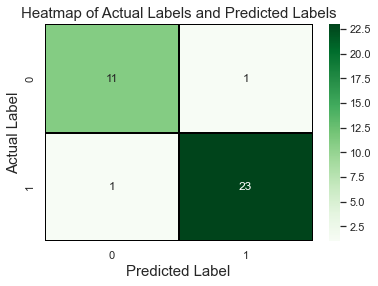

In [115]:
# Heat map of predicted values against actual values

heatmap(cross_eval_labels_class3, class3_cross_eval_prediction, "Heatmap of Actual Labels and Predicted Labels", "Cross_tab_heatmap_for_class3.jpg")

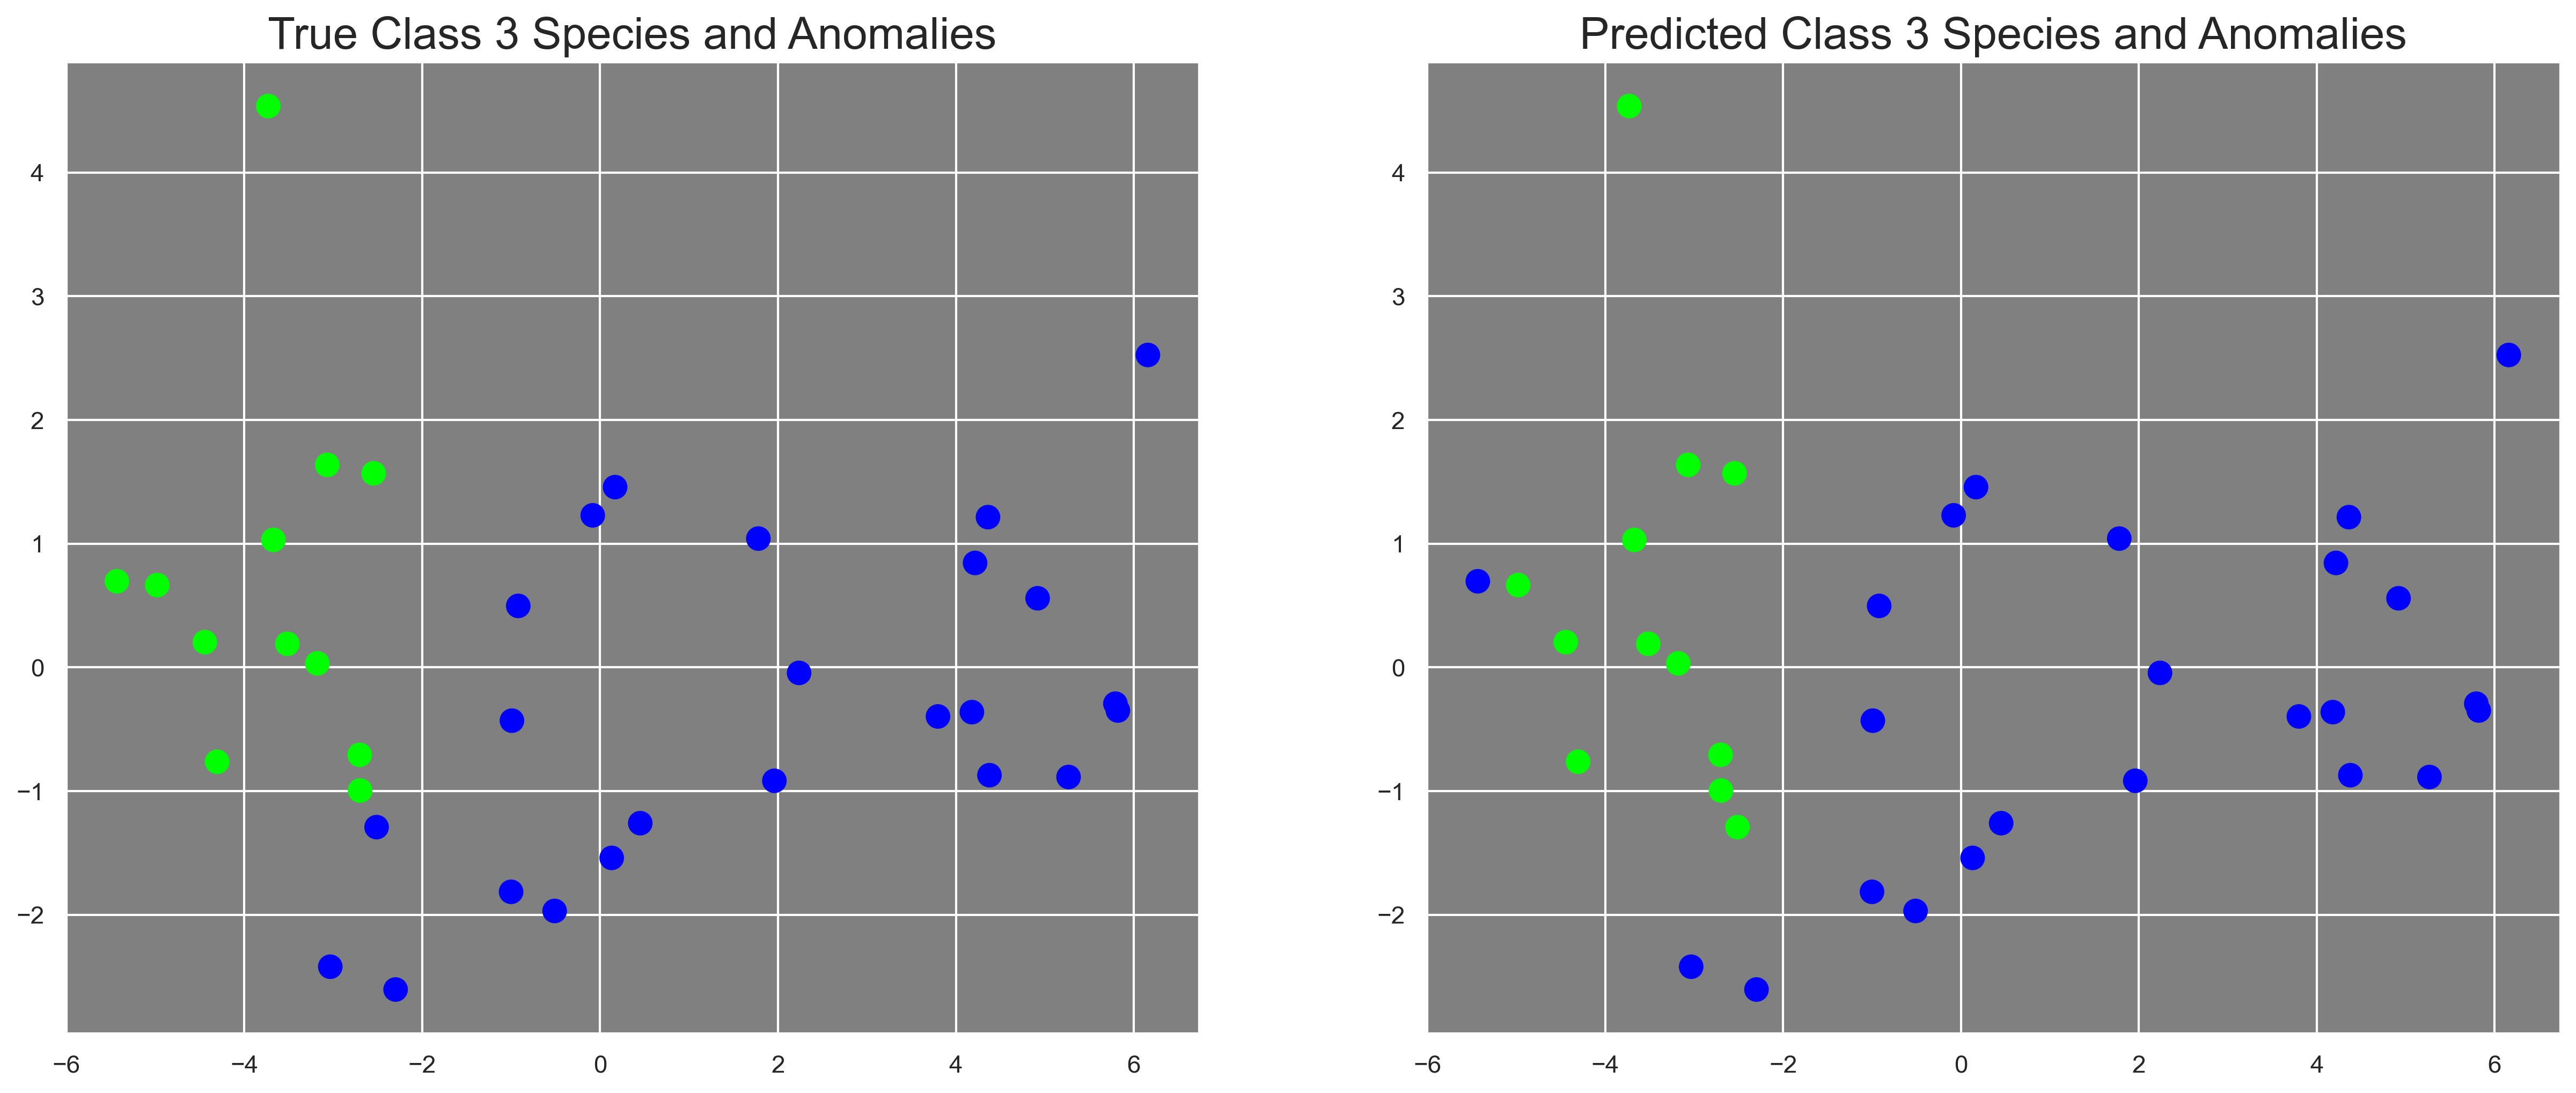

In [116]:
train_plot(cross_eval_labels_class3,class3_cross_eval_prediction, 3, "Class3_Original_Anomaly.jpg")

### Class 3 Test Dataset

In [117]:
# Predict the anomalies within the test dataset
prediction_test_class3 = one_class_svm_dataset3.predict(class_test_dataset)
print(prediction_test_class3)

[-1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1]


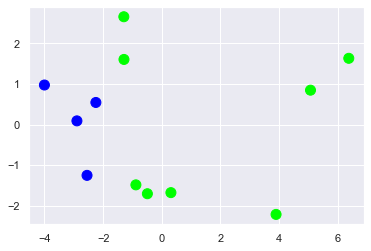

In [118]:
test_plot(prediction_test_class3,"Class3_test_set.jpg")